<a href="https://colab.research.google.com/github/omkarnitsureiitb/ML-Model-Implementations/blob/main/LinearRegression_Implementation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Linear Regression
## Author - Omkar Nitsure
### Email - omkarnitsure2003@gmail.com
### github - https://github.com/omkarnitsureiitb


In [64]:
# importing libraries
import numpy as np
import matplotlib.pyplot as plt

In [65]:
# mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Generating Data

In [66]:
# defined an array x of atleast 100 points with a separation of at least 1
x = np.zeros(100)

# now choose any 2 values for A, B and generate an array y_true such that y_true = Ax + B for all x defined above
A = 3
B = 7

# generated the true line
y_true = np.empty(100)
for n in range(20,120):
  y_true[n-20] = A*n + B
  x[n-20] = n

## Adding noise of Uniform Distribution

In [67]:
# Adding Gaussian Noise which can vary from upto -20 to 20 to y_true to get our data
noise = np.random.rand(100)
data = y_true + 40*(noise-0.5)

In [68]:
# printing the data, y_true and x
print(data, y_true, x)

[ 53.76164121  73.96477033  88.63766267  65.76175797  86.99169481
  65.22739055  94.20319088  70.21215723  86.42382803  83.36507204
 102.09546927 117.60492768  94.89098946 112.68890753  92.21263889
 102.80277631 121.65255242 102.30547459 131.15933526 108.84054372
 129.48774039 146.03279412 144.20991207 144.64016422 154.56179223
 158.09449366 159.33481245 134.79689189 146.75353816 169.82101344
 140.71482979 148.55832559 180.73068088 147.24100681 178.05121303
 170.06186314 184.52095202 172.1524484  182.23077236 164.50925277
 200.52777788 179.33654608 200.1686489  184.59227854 203.14189894
 193.85424404 202.41672604 213.93106423 218.59927546 220.30127187
 221.91321953 232.60022669 215.55122631 245.02127792 236.9304728
 251.37320032 231.32912221 235.66138069 238.69001626 236.8779628
 257.07932737 250.76700406 260.92042747 272.20070361 261.36671645
 248.87998468 271.21802392 265.74645725 264.57245173 260.55732242
 277.53389176 298.60245897 282.09857934 298.93460992 303.52792782
 289.1559709

## Plotting the generated data for visualization

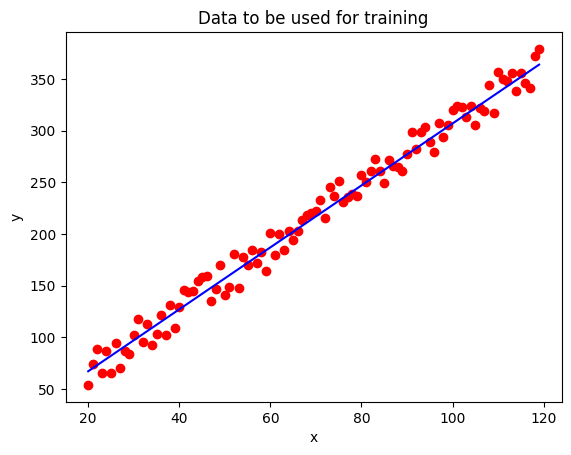

In [69]:
# plotted scatterplot between data and x
# also plotted y_true vs x on the same plot
plt.scatter(x, data, color="red")
plt.plot(x, y_true, color="blue")
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data to be used for training')
plt.savefig("/content/drive/MyDrive/Plots/data_true_line.jpg")
plt.show()

## Cost Function

In [70]:
# function definition to calculate cost of linear Regression
def cost(model, data):
  m = len(data)
  cost = np.sum((model - data)**2)
  cost = cost/(2*m)
  return np.round(cost, 2)

## Derivatives

In [71]:
# function definition to calculate derivative of cost function of linear regression with respect to parameter A
def derivative_a(model, data, x):
  m = len(data)
  dfdx = np.sum(2*x*(model - data))
  return dfdx/m

In [72]:
# function definition to calculate derivative of cost function of linear regression with respect to parameter B
def derivative_b(model, data, x):
  m = len(data)
  dfdx = np.sum(2*(model - data))
  return dfdx/m

## Initialization of parameters before training

In [73]:
# defining A = 0 and B = 0 randomly before training
# also defining 2 lists to store values of A and B after various iterations of training
a = 0
b = 0
a_iterations = []
b_iterations = []

In [74]:
# computing the model array based on initial values of A and B
# Also printing the cost function for the data before training
model = a*x + b
print("cost at iteration 0 : ", cost(model, data))

cost at iteration 0 :  27404.02


## Learning rate

In [75]:
# Defining the Learning rate, alpha.
alpha = 0.00017

## Gradient Descent

In [76]:
# main training loop based on Gradient Descent
# printing the cost after every 100 iterations while training
# saved the values of A and B after different iterations
iterations = 0
cost_i = 200

# main training loop
while cost_i > 100 or iterations <= 2000:
  iterations += 1

  # parameter update
  a = a - alpha*derivative_a(model, data, x)
  b = b - alpha*derivative_b(model, data, x)

  model = a*x + b

  if(iterations % 100 == 0):
    cost_i = cost(model, data)
    print("cost at iteration", iterations + 1," : ", cost_i)

  if(iterations == 5 or iterations == 5 or iterations == 10 or iterations == 20 or iterations == 50 or iterations == 1999):
    a_iterations.append(np.round(a, 2))
    b_iterations.append(np.round(b, 2))

cost at iteration 101  :  64.86
cost at iteration 201  :  64.83
cost at iteration 301  :  64.8
cost at iteration 401  :  64.78
cost at iteration 501  :  64.76
cost at iteration 601  :  64.73
cost at iteration 701  :  64.71
cost at iteration 801  :  64.69
cost at iteration 901  :  64.66
cost at iteration 1001  :  64.64
cost at iteration 1101  :  64.62
cost at iteration 1201  :  64.6
cost at iteration 1301  :  64.57
cost at iteration 1401  :  64.55
cost at iteration 1501  :  64.53
cost at iteration 1601  :  64.51
cost at iteration 1701  :  64.49
cost at iteration 1801  :  64.47
cost at iteration 1901  :  64.45
cost at iteration 2001  :  64.43


## Printing results

In [77]:
# printing the two lists for A and B to see how those values change with number of iterations
print(a_iterations, b_iterations)

[5.22, 1.67, 2.44, 3.04, 3.1] [0.07, 0.02, 0.04, 0.05, 0.59]


In [78]:
# final values of A and B at the end of training
print("A =", np.round(a, 2))
print("B =", np.round(b, 2))

A = 3.1
B = 0.59


## Generation and plotting of models

In [79]:
# generating different models for A and B which were stored in the lists while training
model1 = a_iterations[0]*x + b_iterations[0]
model2 = a_iterations[1]*x + b_iterations[1]
model3 = a_iterations[2]*x + b_iterations[2]
model4 = a_iterations[3]*x + b_iterations[3]
model5 = a_iterations[4]*x + b_iterations[4]
model_final = np.round(a, 2)*x + np.round(b, 2)

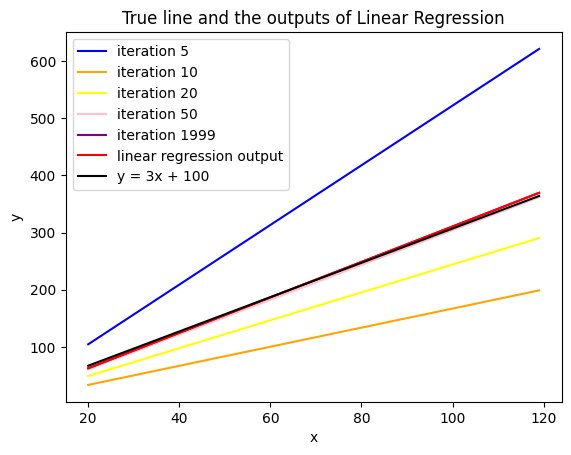

In [80]:
# plotting the different models we defined earlier and also y_true vs x on the same plot
plt.plot(x, model1, color="blue", label='iteration 5')
plt.plot(x, model2, color="orange", label='iteration 10')
plt.plot(x, model3, color="yellow", label='iteration 20')
plt.plot(x, model4, color="pink", label='iteration 50')
plt.plot(x, model5, color="purple", label='iteration 1999')
plt.plot(x, model_final, 'r-', label='linear regression output')

# True line depicted in black in the following figure
plt.plot(x, y_true, 'k-', label='y = 3x + 100')
plt.legend()
plt.title('True line and the outputs of Linear Regression')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig("/content/drive/MyDrive/Plots/linearRegression_training.jpg")
plt.show()